<a href="https://colab.research.google.com/github/fouziasharkar/Pandas-Case-Study/blob/main/Case_Study_2_(IMDB_50k_movie_reviews).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
movies = pd.read_csv('/content/IMDB Dataset.csv')

In [6]:
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
movies = movies.drop_duplicates()

# Data Cleaning

* Lowercase
* remove whitespace
* remove html tags
* remove urls
* Expanding Abbreviations
* spelling correction
* punctuation remove


In [9]:
#lowercaase
movies['review'] = movies['review'].str.lower()
movies.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [10]:
#remove whitespace
movies['review'] = movies['review'].str.strip()

In [11]:
#remove html tags

movies['review']= movies['review'].str.replace(r'<.*?>','',regex=True)
movies.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [12]:
#remove urls

movies['review'] = movies['review'].str.replace(r'http\S+|www\S+','',regex=True)


In [13]:
#Expanding Abbreviations
abbreviations = {
    "he's": "he is",
    "there's": "there is",
    "We're": "We are",
    "That's": "That is",
    "won't": "will not",
    "they're": "they are",
    "Can't": "Cannot",
    "wasn't": "was not",
    "don\x89Ûªt": "do not",
    "aren't": "are not",
    "isn't": "is not",
    "What's": "What is",
    "haven't": "have not",
    "hasn't": "has not",
    "There's": "There is",
    "He's": "He is",
    "It's": "It is",
    "You're": "You are",
    "I'M": "I am",
    "shouldn't": "should not",
    "wouldn't": "would not",
    "i'm": "I am",
    "I\x89Ûªm": "I am",
    "I'm": "I am",
    "Isn't": "is not",
    "Here's": "Here is",
    "you've": "you have",
    "you\x89Ûªve": "you have",
    "we're": "we are",
    "what's": "what is",
    "couldn't": "could not",
    "we've": "we have",
    "it\x89Ûªs": "it is",
    "doesn\x89Ûªt": "does not",
    "It\x89Ûªs": "It is",
    "Here\x89Ûªs": "Here is",
    "who's": "who is",
    "I\x89Ûªve": "I have",
    "y'all": "you all",
    "can\x89Ûªt": "cannot",
    "would've": "would have",
    "it'll": "it will",
    "we'll": "we will",
    "wouldn\x89Ûªt": "would not",
    "We've": "We have",
    "he'll": "he will",
    "Y'all": "You all",
    "Weren't": "Were not",
    "Didn't": "Did not",
    "they'll": "they will",
    "they'd": "they would",
    "DON'T": "DO NOT",
    "That\x89Ûªs": "That is",
    "they've": "they have",
    "i'd": "I would",
    "should've": "should have",
    "You\x89Ûªre": "You are",
    "where's": "where is",
    "Don\x89Ûªt": "Do not",
    "we'd": "we would",
    "i'll": "I will",
    "weren't": "were not",
    "They're": "They are",
    "Can\x89Ûªt": "Cannot",
    "you\x89Ûªll": "you will",
    "I\x89Ûªd": "I would",
    "let's": "let us",
    "it's": "it is",
    "can't": "cannot",
    "don't": "do not",
    "you're": "you are",
    "i've": "I have",
    "that's": "that is",
    "i'll": "I will",
    "doesn't": "does not",
    "i'd": "I would",
    "didn't": "did not",
    "ain't": "am not",
    "you'll": "you will",
    "I've": "I have",
    "Don't": "do not",
    "I'll": "I will",
    "I'd": "I would",
    "Let's": "Let us",
    "you'd": "You would",
    "It's": "It is",
    "Ain't": "am not",
    "Haven't": "Have not",
    "Could've": "Could have",
    "youve": "you have",
    "donå«t": "do not"
}

movies['review'] = movies['review'].replace(abbreviations,regex=True)

In [14]:
#spelling correction

#from textblob import TextBlob

#def spelling_correction(review):
    #return TextBlob(review).correct().string


#movies['review'].apply(spelling_correction)

In [15]:
#punctuation remove

import string

punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuation(review):

    for i in review:
        if i in punc:
            review = review.replace(i,'')
    return review


movies['review'] = movies['review'].apply(remove_punctuation)
movies.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


# Preprocessing
* tokenazation(keep string)
* removing stop words

In [17]:
#tokenization

from nltk.tokenize import word_tokenize

movies['tokenize_review'] = movies['review'].apply(word_tokenize )

In [18]:
#removing stop words

from nltk.corpus import stopwords

sw_list = stopwords.words('english')
sw_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
def stopword_remove(token_review):

    l= []
    for word in token_review:
        if word not in sw_list:
            l.append(word)

    return l

In [20]:
movies.head()
movies['tokenize_review'] = movies['tokenize_review'].apply(stopword_remove)

# EDA and Feature Engineering
* sentiment_score
* common unigram/bigram/trigram
* wordcloud

In [21]:
movies.head()

,review,sentiment,tokenize_review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


In [22]:
movies['review'] = movies['tokenize_review'].apply(lambda x:" ".join(x))

In [23]:
movies.head()

,review,sentiment,tokenize_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


In [24]:
#sentiment_score
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')
import seaborn as sns

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [25]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

In [26]:
def calculate_sentiment_score(review):
    pos_count = sum(1 for word in review if word in positive_words)
    neg_count = sum(1 for word in review if word in negative_words)
    return pos_count - neg_count


movies['sentiment_score'] = movies['tokenize_review'].apply(calculate_sentiment_score)

In [27]:
movies.head()

,review,sentiment,tokenize_review,sentiment_score
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",-7
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",10
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",5
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",-4
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",13


<ipython-input-28-303c424b206e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movies[movies['sentiment'] == 'positive']['sentiment_score'])
<ipython-input-28-303c424b206e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movies[movies['sentiment'] == 'negative']['sentiment_score'])


<Axes: xlabel='sentiment_score', ylabel='Density'>

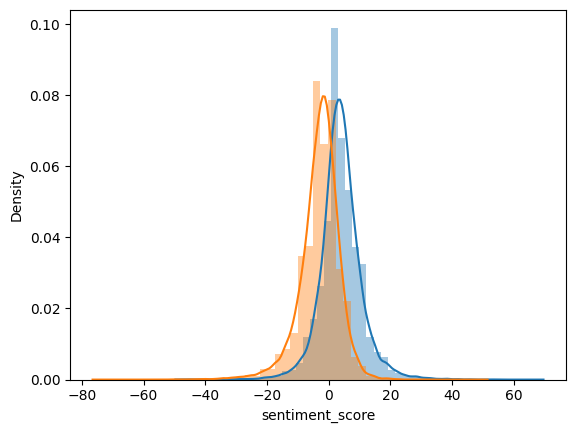

In [28]:
sns.distplot(movies[movies['sentiment'] == 'positive']['sentiment_score'])
sns.distplot(movies[movies['sentiment'] == 'negative']['sentiment_score'])

In [29]:
#from nltk import ngrams

#bigrams
#pd.Series(ngrams(movies['tokenize_review'].sum(),2)).value_counts()

In [30]:
#trigrams
#pd.Series(ngrams(movies['tokenize_review'].sum(),3)).value_counts()

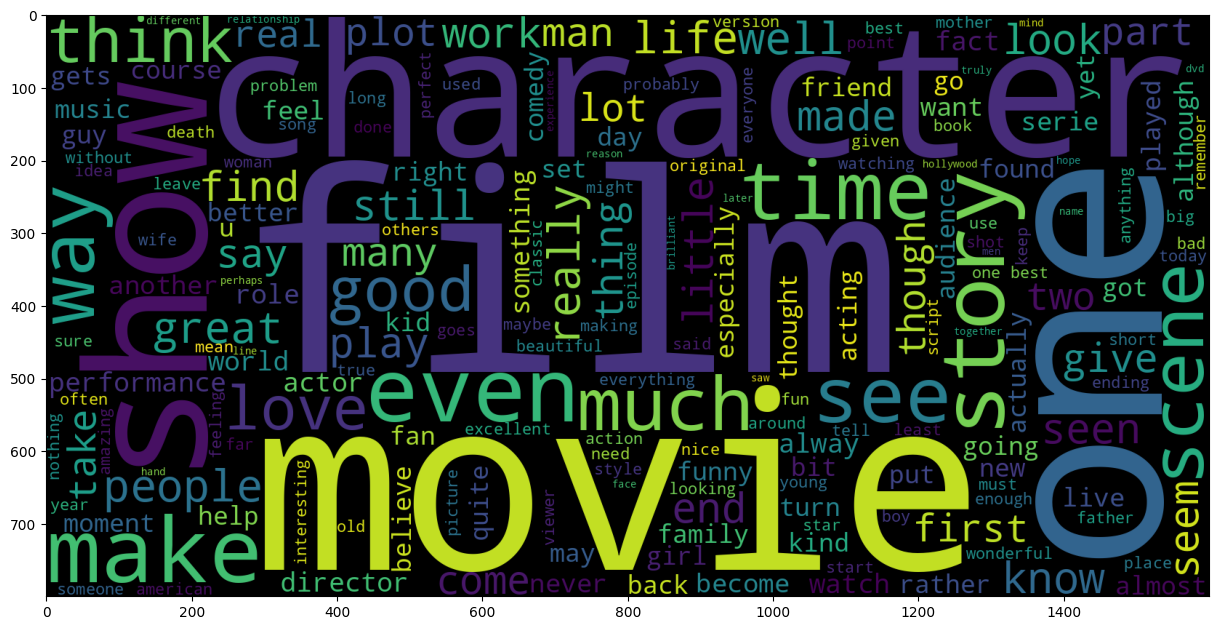

In [33]:
#word cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(movies[movies['sentiment'] == 'positive']['review']))
plt.imshow(wc)

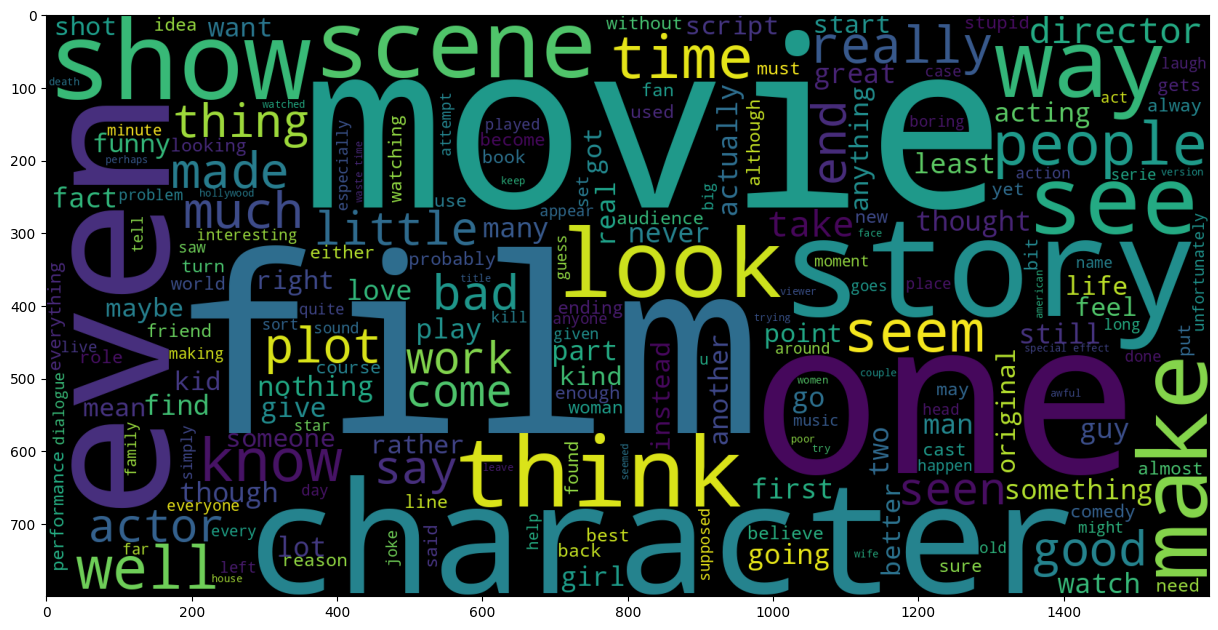

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(movies[movies['sentiment'] == 'negative']['review']))
plt.imshow(wc)

# Vectorization



*   BOW (Bag of Words)




In [36]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=10000,ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(movies['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

In [37]:
bag_of_words

,10,10 10,10 lines,10 minutes,10 stars,10 years,100,1000,101,1010,...,youngsters,youth,youthful,youtube,zany,zero,zombie,zombie movie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

<Axes: >

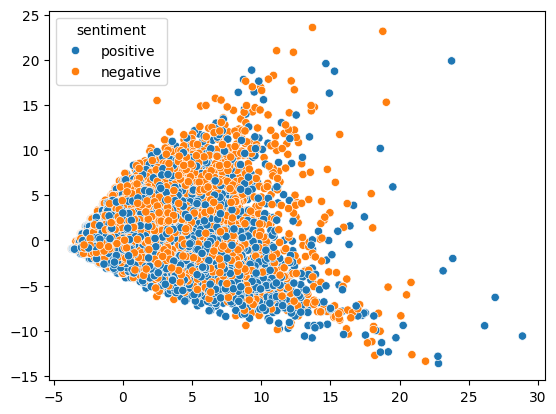

In [41]:
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=movies['sentiment'])